# Data Visualisation 2: How to explore data through visualisation

## About Seaborn

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/seaborn_logo.png?raw=true" height=200 align="left">


The Seaborn library is built on top of matplotlib, meaning that it generates figures and objects compatible with the matplotlib library. However, it is designed to make complex analytical plotting simpler with single commands that produce otherwise very complex plots. Seaborn closely integrates with Pandas, making our job even easier.


### The Data

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/RMS_Titanic_3.jpg?raw=true" align="right" width=150>

Today we will be using the Titanic dataset, which provides us information on the pasengers on the ill fated ship, [RMS Titanic](https://en.wikipedia.org/wiki/Titanic). Note that whilst a historical event, you may still find some of the discussion upsetting as we consider age, class, gender, family relations and survival. It is commonly used for teaching data exploration and visualisation, which in itself, is something worth questioning!


## Setup - Loading our Imports and Dataset

In [5]:
import seaborn as sns

In [121]:
titanic_df = sns.load_dataset('titanic')
titanic_df['pclass'] = titanic_df['pclass'].astype('category')
titanic_df['alive'] = titanic_df['alive'].astype('category')
titanic_df['n_family'] = titanic_df['parch'] + titanic_df['sibsp']

# Distributions and Densities

In the last session we focused on categories, visualising the differences between categories around things like passenger age and fare.

Throughout we were close to using these plots to understand the distribution of values, understanding the spread of prices or ages of passengers etc.

Seaborn `displot` is for plotting distributions of values. Key ways of plotting distributions are histograms and kernel density estimates. These are not too far from the boxen plots and violin plots we've been using.

Many of the `displot` arguments are similar to the seaborn `catplot` method.

By default displot creates a Histogram. Histograms take a range of values, split them into bins or categories and then count the number of instances in each bin and display it as a bar chart.

In [10]:
sns.displot?

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

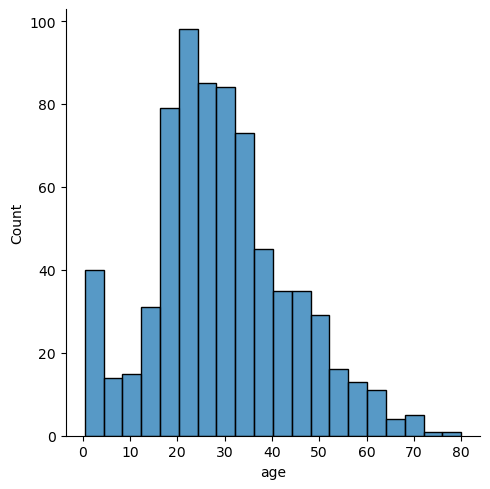

In [9]:
sns.displot(data=titanic_df, x='age')



When makng histograms, it is always advisable to adjust the bin size to see if it improves comprehension. For example if we set our `binwidth` to 5 or 10, it makes it easier to quickly understand the age range as it increments.

`binrange` allows us to adjust the minimum and maximum value.

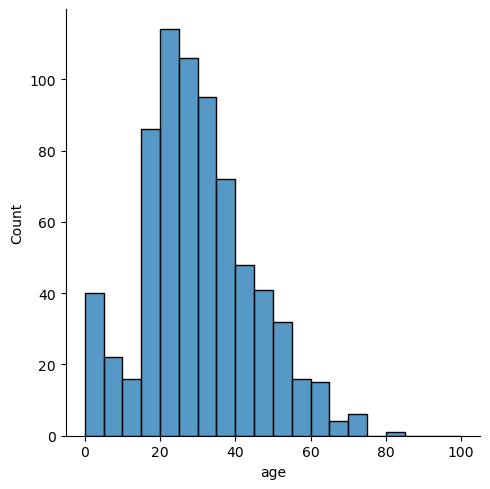

In [25]:
sns.displot(data=titanic_df, x='age', binwidth=5, binrange=(0,100))


We can use the `hue` keyword to colour the data by class to give us a better sense of whether the average age of classes differed as well.

This helps though it is a bit unclear where the bars overlap in the middle and where the ages begin and end. let's make a few adjustments.
First we'll change the bin size to increments of 5 so each bar represents an age range of 5 years.

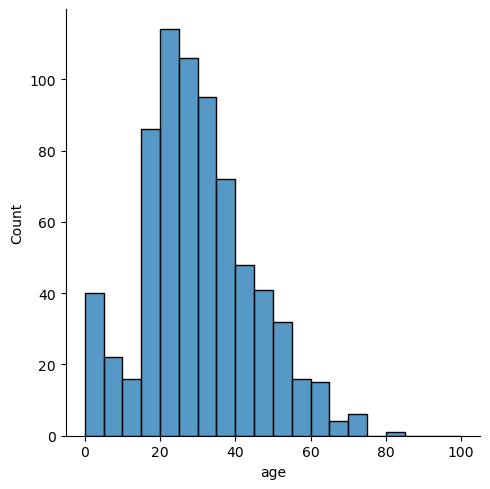

In [27]:
sns.displot(data=titanic_df, x='age', binwidth=5, binrange=(0,100))

Like the other plots we can split our data by colour, into seperate columns etc.

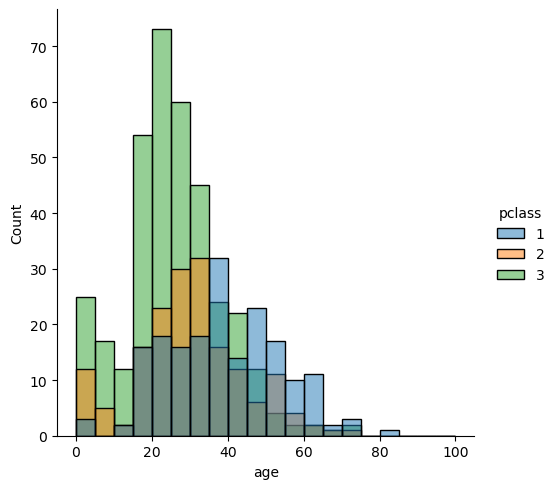

In [28]:
sns.displot(data=titanic_df, x='age', binwidth=5, binrange=(0,100), hue='pclass')

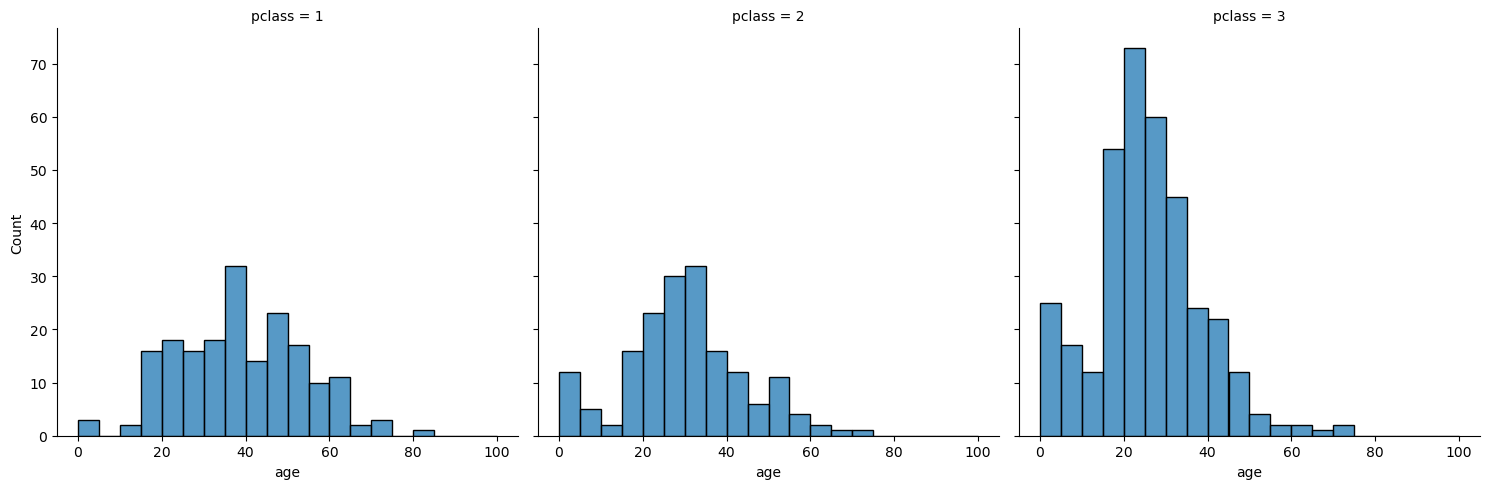

In [29]:
sns.displot(data=titanic_df, x='age', binwidth=5, binrange=(0,100), col='pclass')

In both these approaches it is still difficult to tell the overall difference in age distribution by class. Here is where the Kernel Density Estimate can be useful.

We used Kernel Density Estimates to make our Violin plots before. Same idea, higher density of points means a wider (or in this case higher) curve.

We can add one to our existing visual using the keyword argument `kde=True`

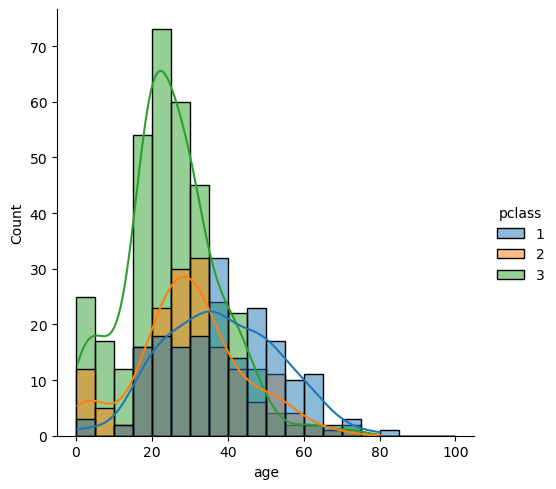

In [30]:
sns.displot(data=titanic_df, x='age', binwidth=5, binrange=(0,100), hue='pclass', kde=True)


The KDE indicates to us that someone in 3rd class was much more likely to be younger, whilst those in second and first class had a much broader age range, though first class tended to be older than everyone.

In [31]:
# We can roughly check if this makes sense by looking at the mean ages of our different classes using groupby.
titanic_df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

This is a good demonstration of how a KDE follows the pattern of the dstributions. However it is messy now and hard to read. We could clean this up by just relying on the KDE...

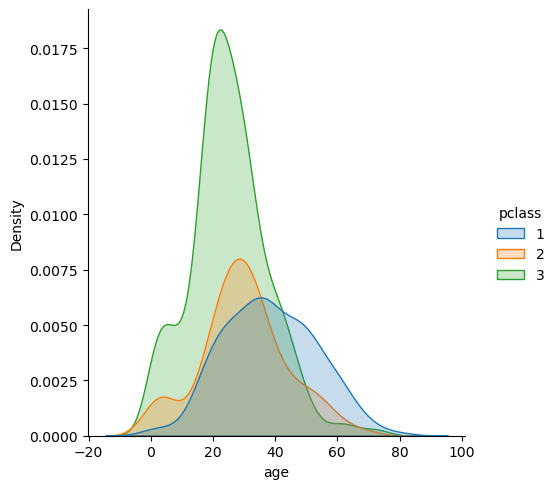

In [39]:
# Rather than add a KDE like before, we change the entire kind of distribution plot to a KDE plot, and fill the area below the lines.

sns.displot(data=titanic_df, x='age', kind='kde', hue='pclass', fill=True)


The benefit of the KDE is that it is clearer when making comparisons, but again it can't be read directly because there are no passengers under the age of 0. In this scenario 

## Exercises: Section 1
Complete section 1 of the exercises.

# Relationships and trends

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/spurious_chart.png?raw=true" height=400 align="right">

##### Predicting space launches via Sociology doctorates - from [Spurious Correlations](http://www.tylervigen.com/spurious-correlations) by Tyler Vigen.


Visualising the right way allows us to better understand the relationships between different variables. Often in data science it is framed as prediction. Using a set of known variables to predict a hitherto unknown outcome. In social science we are less interested in the prediction, and more interested in understanding why particular variables are predictive.

Never take predictive relationships at face value, always seek to explain them.

## Visualising Regressions
Regressions are about finding the optimal trend that explains the relationship between two variables. For example you might have a positive relationship between height and weight to the point where we could predict someone's likely weight based on their height.

Logistic regresson is similar, but it tells us if a value impacts on the likelihood of a certain categorisation, such as for example, someone's age impact on someone's survival.

A `lmplot` is a basic scatter and line plot but it has some interesting regression features. First let's plot age against survival just to see the most basic result.

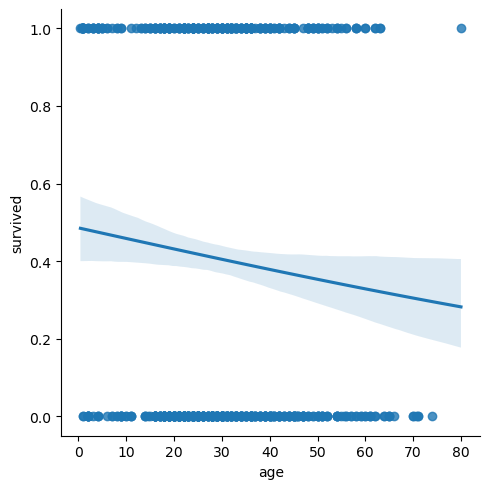

In [108]:
sns.lmplot(data=titanic_df, x='age', y='survived', logistic=True)

It is difficult to see but each point is a passenger, and they are position depending on their age and survival. As survival is either a 1 or a 0 each passenger is part of one or other horizontal line.

The regression line tells us that as age increases, liklihood of survival decreases. The shaded area tells us how confident the model is in its prediction, with a thinner line indicating greater condidence. Lower confidence happens when there are less samples to reinforce the trend. For example there are relatively few passengers over 65 so the confidence deteriorates.

Let's investigate what happens if we introduce class into this, and to improve visibility we'll add some `jitter` to seperate the points out. This is purely visual and has no impact upon the underlying data.

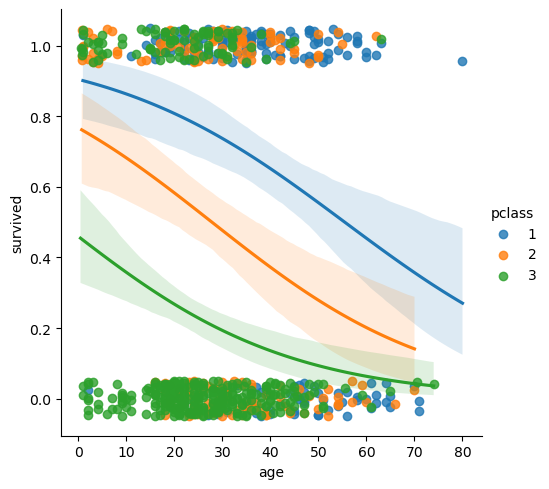

In [109]:
sns.lmplot(x='age',y='survived', data=titanic_df, logistic=True, hue='pclass', y_jitter=0.05)

With the addition of class we can see differences in survival. Whilst age does have a negative impact on survival across classes, average survival chances whatever your age are better the higher class you are.

Famously, the Titanic's crew opted to evacuate women and children first. It was purportedly a difference in interpretation that meant that some crew opted to evacuate ONLY women and children, deploying lifeboats with empty seats believing the captain had prohibited men from being evacuated.

Let's examine this in the data. We can't colour by `sex` but we can split the data again using `row` and `col`. 

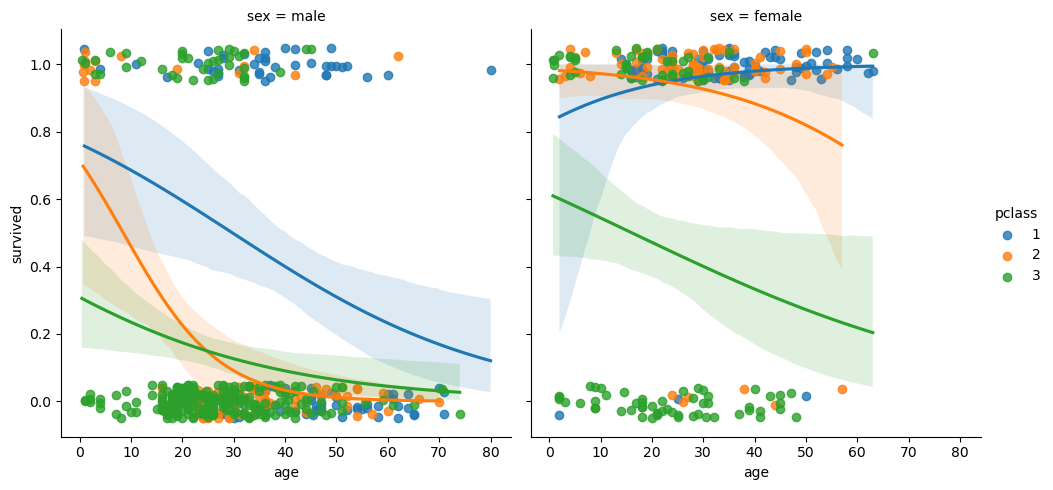

In [116]:
sns.lmplot(x='age',y='survived', data=titanic_df, logistic=True, hue='pclass', y_jitter=0.05,
           col='sex')

If we just split the plots by `sex` we can compare the difference class outcomes within each gender category and see that overall survival was worse for men overall, with a significant dropoff after the age of 20, but not necessarily for those in first class.

For women, average survival was higher, but third class women had a much lower survival rate, and for first class women survival increased with age, bucking the trend for everyone else.

If we split the data again we can produce a seperate plot for each class/sex category.

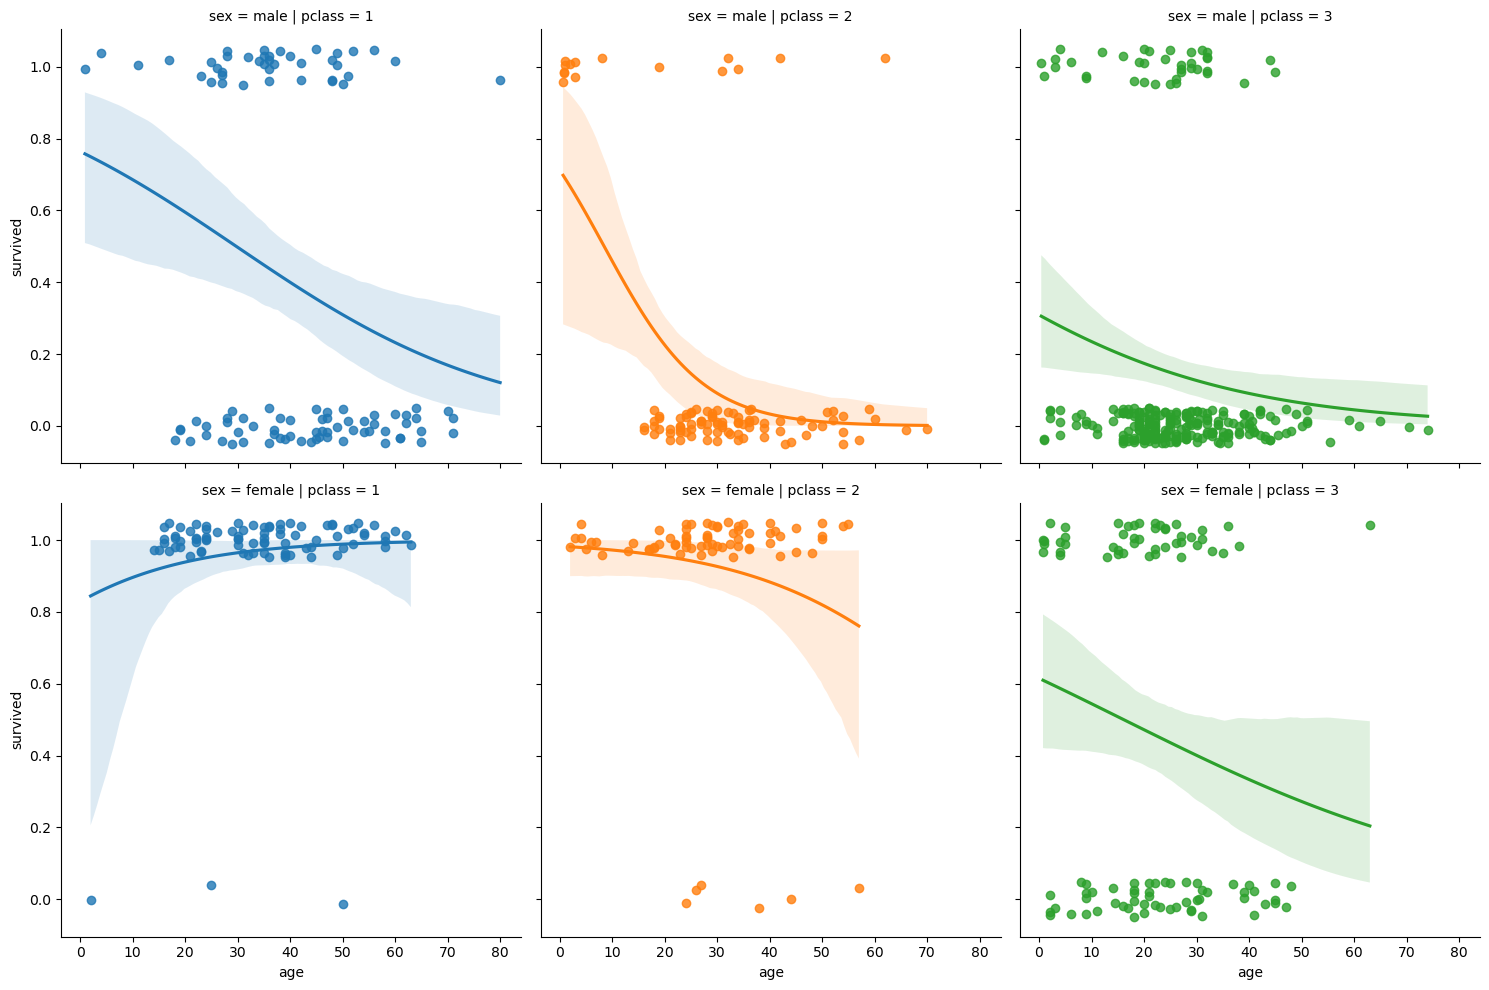

In [126]:
sns.lmplot(x='age',y='survived', data=titanic_df, logistic=True, hue='pclass', y_jitter=0.05,
           row='sex', col='pclass')

We could of course get these kinds of insights through single values in Pandas, however the visualisation helps communicate these differences better and allows us to understand the different dimensions involved.

In [131]:
survival = titanic_df['survived'].mean()
survival

0.3838383838383838

In [129]:
class_survival = titanic_df.groupby('pclass')['survived'].mean()
class_survival

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [127]:
class_sex_survival = titanic_df.groupby(['class','sex'])['survived'].mean()
class_sex_survival

class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

## Exercises: Section 2
Complete the exercises under section 2. If you finish early you can continue to experiment with Seaborn's `displot` or take a look at the recommended DataCamp or textbook chapters, or check out the different YouTube series' about Seaborn linked from Moodle.